# Data Mining Final Project

- Group members: 
    - Zhehao Guo (zhg26@pitt.edu)
    - Tong Ka (tok31@pitt.edu)
    - Xiaoqian Xu (xix64@pitt.edu)
- Data set resource: [Link](https://www.kesci.com/home/competition/56cd5f02b89b5bd026cb39c9/content/1)

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import collections
from functools import reduce
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import lightgbm as lgb
import collections
#from pyecharts import Map, Geo
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import math
from sklearn.linear_model import LinearRegression
import shap
import hyperopt as hp
from hyperopt import Trials, fmin, STATUS_OK
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [5]:
train_loginfo = pd.read_csv("data/PPD-First-Round-Data-Update/Training Set/PPD_LogInfo_3_1_Training_Set.csv", encoding='gbk')
train_master = pd.read_csv("data/PPD-First-Round-Data-Update/Training Set/PPD_Training_Master_GBK_3_1_Training_Set.csv", encoding='gbk')
train_userinfo = pd.read_csv("data/PPD-First-Round-Data-Update/Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv", encoding='gbk')

In [6]:
test_loginfo = pd.read_csv("data/PPD-First-Round-Data-Update/Test Set/PPD_LogInfo_2_Test_Set.csv", encoding='gbk')
test_master = pd.read_csv("data/PPD-First-Round-Data-Update/Test Set/PPD_Master_GBK_2_Test_Set.csv", encoding='gb18030')
test_userinfo = pd.read_csv("data/PPD-First-Round-Data-Update/Test Set/PPD_Userupdate_Info_2_Test_Set.csv", encoding='gbk')

In [11]:
train_loginfo2 = pd.read_csv("data/PPD-Second-Round-Data-Updated/second round newly added data/LogInfo_9w_3_2.csv", encoding='gbk')
train_master2 = pd.read_csv("data/PPD-Second-Round-Data-Updated/second round newly added data/Kesci_Master_9w_gbk_3_2.csv", encoding='gbk')
train_userinfo2 = pd.read_csv("data/PPD-Second-Round-Data-Updated/second round newly added data/Userupdate_Info_9w_3_2.csv", encoding='gbk')

In [12]:
train_master = pd.concat([train_master, train_master2])
train_loginfo = pd.concat([train_loginfo, train_loginfo2])
train_userinfo = pd.concat([train_userinfo, train_userinfo2])

# Data Exploration

## Master dataset

In [13]:
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,222,-1,0,0,0,0,0,1,0,2014/3/5
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,1,-1,0,0,0,0,0,2,0,2014/2/26
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,-1,-1,-1,1,0,0,0,0,0,2014/2/28
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,0,0,0,0,0,0,2014/2/25
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,-1,-1,-1,0,0,0,0,0,0,2014/2/27


### Outlier

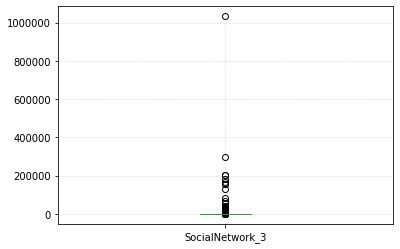

In [14]:
train_master['SocialNetwork_3'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [15]:
train_master['SocialNetwork_3'].describe()

count    6.000000e+04
mean     6.638933e+01
std      4.830254e+03
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      1.032721e+06
Name: SocialNetwork_3, dtype: float64

In [16]:
train_master['SocialNetwork_3'][train_master['SocialNetwork_3']<200000].shape

(59996,)

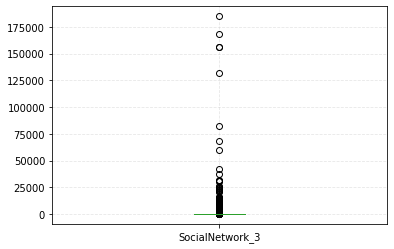

In [17]:
train_master['SocialNetwork_3'][train_master['SocialNetwork_3']<200000].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

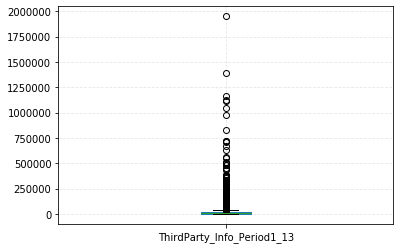

In [18]:
train_master['ThirdParty_Info_Period1_13'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [19]:
train_master['ThirdParty_Info_Period1_13'].describe()

count    6.000000e+04
mean     1.522182e+04
std      2.573820e+04
min     -1.000000e+00
25%      3.837000e+03
50%      9.302500e+03
75%      1.911800e+04
max      1.950405e+06
Name: ThirdParty_Info_Period1_13, dtype: float64

In [20]:
train_master['ThirdParty_Info_Period1_13'][(train_master['ThirdParty_Info_Period1_13']<42039.5) & (train_master['ThirdParty_Info_Period1_13']>-1)].shape

(55850,)

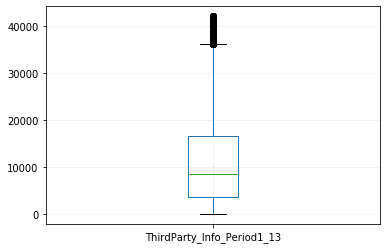

In [21]:
train_master['ThirdParty_Info_Period1_13'][(train_master['ThirdParty_Info_Period1_13']<42039.5) & (train_master['ThirdParty_Info_Period1_13']>-1)].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

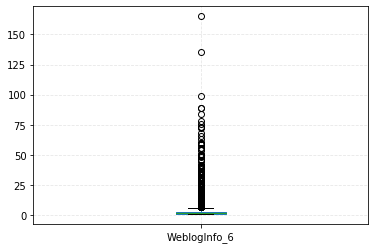

In [22]:
train_master['WeblogInfo_6'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [23]:
train_master['WeblogInfo_6'].describe()

count    56648.000000
mean         2.946476
std          3.641129
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        165.000000
Name: WeblogInfo_6, dtype: float64

In [24]:
train_master[(train_master['WeblogInfo_6']<6) & (train_master['WeblogInfo_6']>1)].shape

(28197, 228)

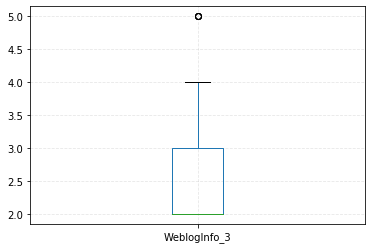

In [25]:
train_master['WeblogInfo_3'][(train_master['WeblogInfo_3']<6) & (train_master['WeblogInfo_3']>1)].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

### Unify datetime

In [26]:
train_master['ListingInfo'].nunique()

670

In [27]:
train_master['ListingInfo'].astype('datetime64').astype('str').nunique()

339

In [28]:
train_master['ListingInfo'] = train_master['ListingInfo'].astype('datetime64').astype('str')

### Delete suffix of city name

In [29]:
def delete_suffix_city(x):
    if str(x) == 'nan' or x == '不详':
        return 'None'
    if len(x.split("、")) == 1 and len(x.split(" ")) == 1:
        if x[-2:] == "地区":
            x = x[:-2]
        if x[-1] == "市":
            x = x[:-1]
    else:
        x = ">1"
    return x
train_master['UserInfo_2'] = train_master['UserInfo_2'].apply(delete_suffix_city)
train_master['UserInfo_4'] = train_master['UserInfo_4'].apply(delete_suffix_city)
train_master['UserInfo_8'] = train_master['UserInfo_8'].apply(delete_suffix_city)
train_master['UserInfo_20'] = train_master['UserInfo_20'].apply(delete_suffix_city)

### Deal with columns which have similar meanings

In [30]:
train_master[['UserInfo_2','UserInfo_4', 'UserInfo_8', 'UserInfo_20', 'UserInfo_24']].head()

,UserInfo_2,UserInfo_4,UserInfo_8,UserInfo_20,UserInfo_24
0,深圳,深圳,深圳,南充,D
1,温州,温州,温州,None,D
2,宜昌,宜昌,宜昌,宜昌,D
3,南平,南平,南平,None,D
4,辽阳,辽阳,辽阳,锦州,D


**Map cities to responding provinces**

In [31]:
China_map={
'香港':['香港'],'澳门':['澳门'],'北京市':['北京市'],'天津市':['天津市'],'上海市':['上海市'],'重庆市':['重庆市'],
'河北省':['石家庄市','唐山市','秦皇岛市','邯郸市','邢台市','保定市','张家口市','承德市','沧州市','廊坊市','衡水市'],
'山西省':['太原市','大同市','阳泉市','长治市','晋城市','朔州市','晋中市','运城市','忻州市','临汾市','吕梁市'],
'内蒙古自治区':['呼和浩特市','包头市','乌海市','赤峰市','通辽市','鄂尔多斯市','呼伦贝尔市','巴彦淖尔市','乌兰察布市','兴安盟','锡林郭勒盟','阿拉善盟','巴彦淖尔盟','乌兰察布盟','古包头市',
         '集宁市'],
'辽宁省':['沈阳市','大连市','鞍山市','抚顺市','本溪市','丹东市','锦州市','营口市','阜新市','辽阳市','盘锦市','铁岭市','朝阳市','葫芦岛市'],
'吉林省':['长春市','吉林市','四平市','辽源市','通化市','白山市','松原市','白城市','延边朝鲜族自治州'],
'黑龙江省':['哈尔滨市','齐齐哈尔市','鸡西市','鹤岗市','双鸭山市','大庆市','伊春市','佳木斯市','七台河市','牡丹江市','黑河市','绥化市','大兴安岭地区','大兴安岭市','延吉市'],
'江苏省':['南京市','无锡市','徐州市','常州市','苏州市','南通市','连云港市','淮安市','盐城市','扬州市','镇江市','泰州市','宿迁市'],
'浙江省':['杭州市','宁波市','温州市','嘉兴市','湖州市','绍兴市','金华市','衢州市','舟山市','台州市','丽水市'],
'安徽省':['合肥市','芜湖市','蚌埠市','淮南市','马鞍山市','淮北市','铜陵市','安庆市','黄山市','滁州市','阜阳市','宿州市','六安市','亳州市','池州市','宣城市','巢湖市'],
'福建省':['福州市','厦门市','莆田市','三明市','泉州市','漳州市','南平市','龙岩市','宁德市'],
'江西省':['南昌市','景德镇市','萍乡市','九江市','新余市','鹰潭市','赣州市','吉安市','宜春市','抚州市','上饶市'],
'山东省':['济南市','青岛市','淄博市','枣庄市','东营市','烟台市','潍坊市','济宁市','泰安市','威海市','日照市','莱芜市','临沂市','德州市','聊城市','滨州市','菏泽市'],
'河南省':['郑州市','开封市','洛阳市','平顶山市','安阳市','鹤壁市','新乡市','焦作市','濮阳市','许昌市','漯河市','三门峡市','南阳市','商丘市','信阳市','周口市','驻马店市','济源市'],
'湖北省':['武汉市','黄石市','十堰市','宜昌市','襄阳市','鄂州市','荆门市','孝感市','荆州市','黄冈市','咸宁市','随州市','恩施土家族苗族自治州','恩施市','襄樊市','江汉市'],
'湖南省':['长沙市','株洲市','湘潭市','衡阳市','邵阳市','岳阳市','常德市','张家界市','益阳市','郴州市','永州市','怀化市','娄底市','湘西土家族苗族自治州'],
'广东省':['广州市','韶关市','深圳市','珠海市','汕头市','佛山市','江门市','湛江市','茂名市','肇庆市','惠州市','梅州市',
'汕尾市','河源市','阳江市','清远市','东莞市','中山市','潮州市','揭阳市','云浮市'],
'广西壮族自治区':['南宁市','柳州市','桂林市','梧州市','北海市','防城港市','钦州市','贵港市','玉林市','百色市','贺州市','河池市','来宾市','崇左市'],
'四川省':['成都市','自贡市','攀枝花市','泸州市','德阳市','绵阳市','广元市','遂宁市','内江市','乐山市','南充市','眉山市',
'宜宾市','广安市','达州市','雅安市','巴中市','资阳市','阿坝藏族羌族自治州','甘孜藏族自治州','凉山彝族自治州','黔江市','万州市'],
'贵州省':['贵阳市','六盘水市','遵义市','安顺市','毕节市','铜仁市','黔西南布依族苗族自治州','黔东南苗族侗族自治州','黔南布依族苗族自治州','黔南市','黔西南市','黔东南市','都匀市','兴义市',
      '凯里市'],
'云南省':['昆明市','曲靖市','玉溪市','保山市','昭通市','丽江市','普洱市','临沧市','楚雄彝族自治州','红河哈尼族彝族自治州',
'文山壮族苗族自治州','西双版纳傣族自治州','大理白族自治州','德宏傣族景颇族自治州','怒江傈僳族自治州','迪庆藏族自治州','凉山市','红河市','德宏市','楚雄市','文山市'],
'陕西省':['西安市','铜川市','宝鸡市','咸阳市','渭南市','延安市','汉中市','榆林市','安康市','商洛市'],
'甘肃省':['兰州市','嘉峪关市','金昌市','白银市','天水市','武威市','张掖市','平凉市','酒泉市','庆阳市','定西市','陇南市','临夏回族自治州','甘南藏族自治州'],
'青海省':['西宁市','海东市','海北藏族自治州','黄南藏族自治州','海南藏族自治州','果洛藏族自治州','玉树藏族自治州','海西蒙古族藏族自治州'],
'宁夏回族自治区':['银川市','石嘴山市','吴忠市','固原市','中卫市'],'海南省':['海口市','三亚市','三沙市','儋州市'],
'西藏自治区':['拉萨市','日喀则市','昌都市','林芝市','山南市','那曲市','阿里地区','迪庆市'],
'新疆维吾尔自治区':['乌鲁木齐市','克拉玛依市','吐鲁番市','哈密市','昌吉回族自治州','博尔塔拉蒙古自治州','巴音郭楞蒙古自治州',
'阿克苏地区','克孜勒苏柯尔克孜自治州','喀什地区','和田地区','伊犁哈萨克自治州','塔城地区','阿勒泰地区','阿克苏市','喀什市','石河子市','和田市','伊犁市','塔城地区市','喀什地区市']
}

In [32]:
def findProvince(x):
    if x[-1] == "省":
        return x
    if x[-2:] != '地区' and not (len(x) > 3 and x[-3:] == "自治州") and not x[-1] == '市' and x != "None" and not (len(x) > 2 and x[-1] == "盟"):
        x += "市"
    for i, j in China_map.items():
        if x in j:
            return i
    return x

In [33]:
train_master['UserInfo_2'] = train_master['UserInfo_2'].fillna("None")
train_master['UserInfo_2_to_province'] = train_master['UserInfo_2'].apply(findProvince)
train_master['UserInfo_4'] = train_master['UserInfo_4'].fillna("None")
train_master['UserInfo_4_to_province'] = train_master['UserInfo_4'].apply(findProvince)

### Default rate of each province

In [34]:
tmp_df = train_master[(train_master['UserInfo_2_to_province']==train_master['UserInfo_4_to_province'])&(train_master['UserInfo_4_to_province']==train_master['UserInfo_19'])&(train_master['UserInfo_2_to_province']==train_master['UserInfo_19'])]
province_default_df = tmp_df[['UserInfo_4_to_province','target']].groupby("UserInfo_4_to_province").sum()/tmp_df[['UserInfo_4_to_province','target']].groupby("UserInfo_4_to_province").count()
province_default_df.head()

,target
UserInfo_4_to_province,
上海市,0.065527
云南省,0.048713
内蒙古自治区,0.046729
北京市,0.072464
吉林省,0.102439


In [36]:
provinces = ['上海','云南','内蒙古','北京','吉林','四川','天津','宁夏','安徽','山东','山西','广东','广西','新疆','江苏'
    ,'江西','河北','河南','浙江','海南','湖北','湖南','甘肃','福建','西藏','贵州','辽宁','重庆','陕西','青海','黑龙江']

In [37]:
province_default_dict = collections.defaultdict(list)
j = 0
for i in province_default_df.index:
    if i[:2] in provinces:
        province_default_dict[i[:2]] = province_default_df.iloc[j].values[0]
    if i[:3] in provinces:
        province_default_dict[i[:3]] = province_default_df.iloc[j].values[0]
    j+=1
province_default_dict

defaultdict(list,
            {'上海': 0.06552706552706553,
             '云南': 0.04871323529411765,
             '内蒙古': 0.04672897196261682,
             '北京': 0.07246376811594203,
             '吉林': 0.1024390243902439,
             '四川': 0.10832544938505204,
             '天津': 0.14492753623188406,
             '宁夏': 0.05371900826446281,
             '安徽': 0.07846715328467153,
             '山东': 0.11127857322280833,
             '山西': 0.06010568031704095,
             '广东': 0.067853170189099,
             '广西': 0.04605678233438486,
             '新疆': 0.047058823529411764,
             '江苏': 0.0795415074678708,
             '江西': 0.0831858407079646,
             '河北': 0.08535242290748898,
             '河南': 0.067578125,
             '浙江': 0.059901338971106416,
             '海南': 0.08582089552238806,
             '湖北': 0.08978328173374613,
             '湖南': 0.10098039215686275,
             '甘肃': 0.05611510791366906,
             '福建': 0.06042764177254416,
             '西藏': 0.0,
        

In [38]:
province_distribution = province_default_dict
province=list(province_distribution.keys())
values=list(province_distribution.values())

map = Map("Default rate of each province",'Map of China', width=1200, height=600)
map.add("", province, values, visual_range=[0, max(province_default_dict.values())],  maptype='china', is_visualmap=True,
    visual_text_color='#000')
# map.show_config()
map.render(path="DefaultRateOfEachProvince.html")
map

NameError: name 'Map' is not defined

### External data
- GDP("https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E7%9C%81%E7%BA%A7%E8%A1%8C%E6%94%BF%E5%8C%BA%E5%9C%B0%E5%8C%BA%E7%94%9F%E4%BA%A7%E6%80%BB%E5%80%BC%E5%88%97%E8%A1%A8")

In [68]:
gdp_df = pd.read_csv("GDP.csv")[['Provinces', 'GDP']]
gdp_df.head()

,Provinces,GDP
0,广东,1103.89
1,江苏,1059.59
2,山东,967.42
3,浙江,653.99
4,河南,568.77


In [69]:
province_gdp_dict = collections.defaultdict(list)
j = 0
for i in gdp_df.index:
    province_gdp_dict[gdp_df.iloc[i]["Provinces"]] = gdp_df.iloc[i]["GDP"]
    j+=1
province_gdp_dict

defaultdict(list,
            {'广东': 1103.89,
             '江苏': 1059.59,
             '山东': 967.42,
             '浙江': 653.99,
             '河南': 568.77,
             '四川': 464.56,
             '湖北': 445.71,
             '河北': 478.95,
             '湖南': 440.15,
             '福建': 391.61,
             '上海': 383.66,
             '北京': 347.25,
             '安徽': 339.4,
             '辽宁': 466.02,
             '陕西': 287.98,
             '江西': 255.82,
             '天津': 256.02,
             '广西': 255.14,
             '云南': 208.61,
             '内蒙古': 289.29,
             '黑龙江': 244.83,
             '山西': 207.75,
             '吉林': 224.7,
             '贵州': 150.85,
             '新疆': 150.97,
             '甘肃': 111.3,
             '海南': 56.99,
             '宁夏': 44.8,
             '青海': 37.5,
             '西藏': 14.99,
             '重庆': 380.1})

In [70]:
province_gdp_distribution = province_gdp_dict
province = list(province_gdp_distribution.keys())
values = list(province_gdp_distribution.values())

map = Map("GDP per capita of each province",'Map of China', width=1200, height=600)
map.add("", province, values, visual_range=[min(province_gdp_dict.values()), max(province_gdp_dict.values())],  maptype='china', is_visualmap=True,
    visual_text_color='#000')
# map.show_config()
map.render(path="GdpPerCapitaOfEachProvince.html")
map

NameError: name 'Map' is not defined

### Deal with same meaning observations

In [40]:
train_master['UserInfo_22'].unique()

array(['D', '未婚', '已婚', '不详', '离婚', '再婚', '初婚', '丧偶', '复婚'], dtype=object)

** Merge 'D' and '不详' ('Unknown')**

In [41]:
def status_marriage(x):
    if x == 'D' or x == '不详':
        return 'None'
    return x
train_master['UserInfo_22'] = train_master['UserInfo_22'].apply(status_marriage)
train_master['UserInfo_22'].unique()

array(['None', '未婚', '已婚', '离婚', '再婚', '初婚', '丧偶', '复婚'], dtype=object)

In [ ]:
# for feature in train_master.columns:
#     if train_master[feature].dtype != 'int64' and train_master[feature].dtype != 'float64':
#         print(feature, train_master[feature].dtype, train_master[feature].unique())

**Strip blank**

In [42]:
train_master['UserInfo_9'].unique()

array(['中国移动 ', '中国电信 ', '不详', '中国联通 ', '中国联通', '中国电信', '中国移动'],
      dtype=object)

In [43]:
train_master['UserInfo_9'] = train_master['UserInfo_9'].str.strip()
train_master['UserInfo_9'].unique()

array(['中国移动', '中国电信', '不详', '中国联通'], dtype=object)

# Feature generation

## loginfo dataset

In [44]:
train_loginfo.head()

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27


In [45]:
train_loginfo['Listinginfo1'] = train_loginfo['Listinginfo1'].astype('datetime64')
train_loginfo['LogInfo3'] = train_loginfo['LogInfo3'].astype('datetime64')

### number_of_train_loginfo

In [46]:
number_of_train_loginfo_df = train_loginfo['Idx'].value_counts().to_frame(name="number_of_train_loginfo")
number_of_train_loginfo_df.index.name = 'Idx'
number_of_train_loginfo_df.head()

,number_of_train_loginfo
Idx,
86155,1959
44451,1957
60899,1869
76291,1292
12671,1262


### LogInfo3

#### For each Idx, latest loginfo3 date

In [47]:
train_loginfo3_max_df = train_loginfo.groupby('Idx')['LogInfo3'].max().to_frame(name="train_loginfo3_max")
train_loginfo3_max_df.head()

,train_loginfo3_max
Idx,
3,2013-11-01
5,2013-11-06
6,2013-11-01
8,2013-11-06
9,2013-11-04


#### For each Idx, earlest loginfo3 date

In [49]:
train_loginfo3_min_df = train_loginfo.groupby('Idx')['LogInfo3'].min().to_frame(name="train_loginfo3_min")
train_loginfo3_min_df.head()

,train_loginfo3_min
Idx,
3,2013-08-30
5,2013-10-24
6,2013-10-14
8,2013-10-25
9,2013-10-26


#### For each Idx, date difference between earliest loginfo3 date and latest loginfo3 date

In [48]:
diff = (train_loginfo.groupby('Idx')['LogInfo3'].max()-train_loginfo.groupby('Idx')['LogInfo3'].min()).map(lambda x: x.days)
train_loginfo3_max_min_diff_df = diff.to_frame(name="train_loginfo3_max_min_diff")
train_loginfo3_max_min_diff_df.head()

,train_loginfo3_max_min_diff
Idx,
3,63
5,13
6,18
8,12
9,9


#### For each Idx, loginfo3 frequency

In [50]:
# frequency decimal is 2; set inf to 1
freq_df = number_of_train_loginfo_df.merge(train_loginfo3_max_min_diff_df, left_index=True, right_index=True, how='inner')
freq_df['freq_loginfo3'] = freq_df['number_of_train_loginfo']/freq_df['train_loginfo3_max_min_diff']
freq_df.drop(columns=['number_of_train_loginfo', 'train_loginfo3_max_min_diff'], inplace = True)
freq_df = freq_df.round(2)
freq_df = freq_df['freq_loginfo3'].map(lambda x: 1 if x == float('inf') else x).to_frame(name="freq_loginfo3")
freq_df.index.name = 'Idx'
freq_df.head()

,freq_loginfo3
Idx,
86155,1.95
44451,177.91
60899,16.11
76291,3.26
12671,7.60


#### For each Idx, number of loginfo1

In [51]:
num_LogInfo1_df = train_loginfo.groupby('Idx')['LogInfo1'].nunique().to_frame(name = '#LogInfo1')
num_LogInfo1_df.head()

,#LogInfo1
Idx,
3,4
5,6
6,4
8,7
9,4


#### For each Idx, number of loginfo2

In [52]:
num_LogInfo2_df = train_loginfo.groupby('Idx')['LogInfo2'].nunique().to_frame(name = '#LogInfo2')
num_LogInfo2_df.head()

,#LogInfo2
Idx,
3,6
5,5
6,6
8,7
9,4


#### All new dfs in train_loginfo

In [53]:
dfs = [number_of_train_loginfo_df, train_loginfo3_max_min_diff_df, freq_df,num_LogInfo1_df,num_LogInfo2_df]
train_loginfo_final = reduce(lambda left,right: pd.merge(left,right,on='Idx'), dfs)
train_loginfo_final.head()

,number_of_train_loginfo,train_loginfo3_max_min_diff,freq_loginfo3,#LogInfo1,#LogInfo2
Idx,,,,,
86155,1959,1003,1.95,8,10
44451,1957,11,177.91,6,6
60899,1869,116,16.11,6,9
76291,1292,396,3.26,12,10
12671,1262,166,7.60,6,11


## Userupdate_Info dataset

In [54]:
train_userinfo.head()

,Idx,ListingInfo1,UserupdateInfo1,UserupdateInfo2
0,10001,2014/03/05,_EducationId,2014/02/20
1,10001,2014/03/05,_HasBuyCar,2014/02/20
2,10001,2014/03/05,_LastUpdateDate,2014/02/20
3,10001,2014/03/05,_MarriageStatusId,2014/02/20
4,10001,2014/03/05,_MobilePhone,2014/02/20


### Lowercase letters

In [55]:
train_userinfo["UserupdateInfo1"].nunique()

87

In [56]:
train_userinfo["UserupdateInfo1"] = train_userinfo["UserupdateInfo1"].map(lambda x: x.lower())
train_userinfo["UserupdateInfo1"].nunique()

55

### Make datatime columns transfered to datetime

In [57]:
train_userinfo['ListingInfo1'] = train_userinfo['ListingInfo1'].astype('datetime64')
train_userinfo['UserupdateInfo2'] = train_userinfo['UserupdateInfo2'].astype('datetime64')

### number_of_train_loginfo

In [58]:
number_of_train_userinfo_df = train_userinfo['Idx'].value_counts().to_frame(name="number_of_train_userinfo")
number_of_train_userinfo_df.index.name = 'Idx'
number_of_train_userinfo_df.head()

,number_of_train_userinfo
Idx,
10648,156
27749,99
2192,93
1533,89
27419,88


### For each Idx, latest and earlest UserupdateInfo2 date

In [59]:
train_UserupdateInfo2_max_df = train_userinfo.groupby('Idx')['UserupdateInfo2'].max().to_frame(name="train_UserupdateInfo2_max")
train_UserupdateInfo2_max_df.head()

,train_UserupdateInfo2_max
Idx,
3,2013-08-30
5,2013-10-24
6,2013-10-14
8,2013-11-04
9,2013-11-04


In [60]:
train_UserupdateInfo2_min_df = train_userinfo.groupby('Idx')['UserupdateInfo2'].min().to_frame(name="train_UserupdateInfo2_min")
train_UserupdateInfo2_min_df.head()

,train_UserupdateInfo2_min
Idx,
3,2013-08-30
5,2013-10-24
6,2013-10-14
8,2013-10-25
9,2013-10-26


### For each Idx, date difference between earlest loginfo3 date and latest loginfo3 date

In [61]:
diff = (train_userinfo.groupby('Idx')['UserupdateInfo2'].max()-train_userinfo.groupby('Idx')['UserupdateInfo2'].min()).map(lambda x: x.days)
train_userinfo_max_min_diff_df = diff.to_frame(name="train_userinfo_max_min_diff")
train_userinfo_max_min_diff_df.head()

,train_userinfo_max_min_diff
Idx,
3,0
5,0
6,0
8,10
9,9


### Frequency

In [62]:
# frequency decimal is 2; set inf to 1
freq_user_df = number_of_train_userinfo_df.merge(train_userinfo_max_min_diff_df, left_index=True, right_index=True, how='inner')
freq_user_df['freq_userinfo'] = freq_user_df['number_of_train_userinfo']/freq_user_df['train_userinfo_max_min_diff']
freq_user_df.drop(columns=['number_of_train_userinfo', 'train_userinfo_max_min_diff'], inplace = True)
freq_user_df = freq_user_df.round(2)
freq_user_df = freq_user_df['freq_userinfo'].map(lambda x: 1 if x == float('inf') else x).to_frame(name="freq_userinfo")
freq_user_df.index.name = 'Idx'
freq_user_df.head()

,freq_userinfo
Idx,
10648,1.51
27749,11.00
2192,1.00
1533,12.71
27419,0.24


### For each idx, number of UserupdateInfo1

In [63]:
num_UserupdateInfo1_df = train_userinfo.groupby('Idx')['UserupdateInfo1'].nunique().to_frame(name = '#UserupdateInfo1')
num_UserupdateInfo1_df.head()

,#UserupdateInfo1
Idx,
3,11
5,11
6,11
8,11
9,13


### All new dfs in train_userinfo

In [64]:
dfs = [number_of_train_userinfo_df, train_userinfo_max_min_diff_df, freq_user_df, num_UserupdateInfo1_df]
train_userinfo_final = reduce(lambda left,right: pd.merge(left,right,on='Idx'), dfs)
train_userinfo_final.head()

,number_of_train_userinfo,train_userinfo_max_min_diff,freq_userinfo,#UserupdateInfo1
Idx,,,,
10648,156,103,1.51,15
27749,99,9,11.00,13
2192,93,0,1.00,12
1533,89,7,12.71,12
27419,88,365,0.24,21


## Combine new features in unserinfo and loginfo data set

In [65]:
dfs = [train_master, train_userinfo_final, train_loginfo_final]
train_df = reduce(lambda left,right: pd.merge(left,right,on='Idx',how='outer'), dfs)
train_df.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,UserInfo_4_to_province,number_of_train_userinfo,train_userinfo_max_min_diff,freq_userinfo,#UserupdateInfo1,number_of_train_loginfo,train_loginfo3_max_min_diff,freq_loginfo3,#LogInfo1,#LogInfo2
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,广东省,11.0,0.0,1.00,10.0,19.0,12.0,1.58,6.0,5.0
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,浙江省,21.0,244.0,0.09,15.0,24.0,249.0,0.10,6.0,6.0
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,湖北省,10.0,0.0,1.00,9.0,14.0,7.0,2.00,5.0,5.0
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,福建省,10.0,0.0,1.00,9.0,7.0,0.0,1.00,4.0,5.0
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,辽宁省,10.0,1.0,10.00,10.0,5.0,7.0,0.71,3.0,3.0


## Map cities to provinces

In [66]:
def findProvince(x):
    if x[-1] == "省":
        return x
    if x[-2:] != '地区' and not (len(x) > 3 and x[-3:] == "自治州") and not x[-1] == '市' and x != "None" and not (len(x) > 2 and x[-1] == "盟"):
        x += "市"
    for i, j in China_map.items():
        if x in j:
            return i
    return x
train_master['UserInfo_2'] = train_master['UserInfo_2'].fillna("None")
train_master['UserInfo_2_to_province'] = train_master['UserInfo_2'].apply(findProvince)
train_master['UserInfo_4'] = train_master['UserInfo_4'].fillna("None")
train_master['UserInfo_4_to_province'] = train_master['UserInfo_4'].apply(findProvince)

## GDP of each province

In [71]:
def map_province_gdp(x):
    if x[:2] in provinces:
        return province_gdp_dict[x[:2]]
    if x[:3] in provinces:
        return province_gdp_dict[x[:3]]
train_master['gdp_province'] = train_master['UserInfo_2_to_province'].apply(map_province_gdp)

## ThirdParty_Info_Period

In [72]:
def ThirdParty_Info_type():
    for i in range(1, 18):
        featureList = []
        for j in range(1, 8):
            featureList.append('ThirdParty_Info_Period'+str(j)+'_'+str(i))
        train_master["ThirdParty_Info_type"+str(i)+"_max"] = train_master[featureList].max(axis=1)
        train_master["ThirdParty_Info_type"+str(i)+"_min"] = train_master[featureList].min(axis=1)
        train_master["ThirdParty_Info_type"+str(i)+"_mean"] = train_master[featureList].mean(axis=1)
        train_master["ThirdParty_Info_type"+str(i)+"_median"] = train_master[featureList].median(axis=1)
ThirdParty_Info_type()

In [73]:
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,ThirdParty_Info_type15_mean,ThirdParty_Info_type15_median,ThirdParty_Info_type16_max,ThirdParty_Info_type16_min,ThirdParty_Info_type16_mean,ThirdParty_Info_type16_median,ThirdParty_Info_type17_max,ThirdParty_Info_type17_min,ThirdParty_Info_type17_mean,ThirdParty_Info_type17_median
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,3070.714286,199.0,30284,-1,12683.000000,9297.0,22972,-1,7314.571429,4082.0
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,37.428571,0.0,54055,-1,25590.714286,26656.0,14519,-1,5893.000000,5353.0
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,101.285714,40.0,9153,-1,5097.714286,5552.0,11274,-1,4408.857143,4456.0
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,240.428571,40.0,14464,-1,10258.000000,11083.0,6495,-1,4114.714286,4254.0
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,1802.714286,2048.0,0,-1,-0.285714,0.0,0,-1,-0.285714,0.0


In [ ]:
train_master['ThirdParty_Info_Period1_max'] = train_master[['ThirdParty_Info_Period1_17',
                        'ThirdParty_Info_Period1_16','ThirdParty_Info_Period1_15',
                        'ThirdParty_Info_Period1_14','ThirdParty_Info_Period1_13','ThirdParty_Info_Period1_12',
                        'ThirdParty_Info_Period1_11','ThirdParty_Info_Period1_10','ThirdParty_Info_Period1_9',
                        'ThirdParty_Info_Period1_8','ThirdParty_Info_Period1_7','ThirdParty_Info_Period1_6',
                        'ThirdParty_Info_Period1_5','ThirdParty_Info_Period1_4','ThirdParty_Info_Period1_3',
                        'ThirdParty_Info_Period1_2','ThirdParty_Info_Period1_1']].max(axis=1)

train_master['ThirdParty_Info_Period1_min'] = train_master[['ThirdParty_Info_Period1_17',
                        'ThirdParty_Info_Period1_16','ThirdParty_Info_Period1_15',
                        'ThirdParty_Info_Period1_14','ThirdParty_Info_Period1_13','ThirdParty_Info_Period1_12',
                        'ThirdParty_Info_Period1_11','ThirdParty_Info_Period1_10','ThirdParty_Info_Period1_9',
                        'ThirdParty_Info_Period1_8','ThirdParty_Info_Period1_7','ThirdParty_Info_Period1_6',
                        'ThirdParty_Info_Period1_5','ThirdParty_Info_Period1_4','ThirdParty_Info_Period1_3',
                        'ThirdParty_Info_Period1_2','ThirdParty_Info_Period1_1']].min(axis=1)

train_master['ThirdParty_Info_Period1_mean'] = train_master[['ThirdParty_Info_Period1_17',
                        'ThirdParty_Info_Period1_16','ThirdParty_Info_Period1_15',
                        'ThirdParty_Info_Period1_14','ThirdParty_Info_Period1_13','ThirdParty_Info_Period1_12',
                        'ThirdParty_Info_Period1_11','ThirdParty_Info_Period1_10','ThirdParty_Info_Period1_9',
                        'ThirdParty_Info_Period1_8','ThirdParty_Info_Period1_7','ThirdParty_Info_Period1_6',
                        'ThirdParty_Info_Period1_5','ThirdParty_Info_Period1_4','ThirdParty_Info_Period1_3',
                        'ThirdParty_Info_Period1_2','ThirdParty_Info_Period1_1']].mean(axis=1)

train_master['ThirdParty_Info_Period1_median'] = train_master[['ThirdParty_Info_Period1_17',
                        'ThirdParty_Info_Period1_16','ThirdParty_Info_Period1_15',
                        'ThirdParty_Info_Period1_14','ThirdParty_Info_Period1_13','ThirdParty_Info_Period1_12',
                        'ThirdParty_Info_Period1_11','ThirdParty_Info_Period1_10','ThirdParty_Info_Period1_9',
                        'ThirdParty_Info_Period1_8','ThirdParty_Info_Period1_7','ThirdParty_Info_Period1_6',
                        'ThirdParty_Info_Period1_5','ThirdParty_Info_Period1_4','ThirdParty_Info_Period1_3',
                        'ThirdParty_Info_Period1_2','ThirdParty_Info_Period1_1']].median(axis=1)

train_master['ThirdParty_Info_Period2_max'] = train_master[['ThirdParty_Info_Period2_17',
                        'ThirdParty_Info_Period2_16','ThirdParty_Info_Period2_15',
                        'ThirdParty_Info_Period2_14','ThirdParty_Info_Period2_13','ThirdParty_Info_Period2_12',
                        'ThirdParty_Info_Period2_11','ThirdParty_Info_Period2_10','ThirdParty_Info_Period2_9',
                        'ThirdParty_Info_Period2_8','ThirdParty_Info_Period2_7','ThirdParty_Info_Period2_6',
                        'ThirdParty_Info_Period2_5','ThirdParty_Info_Period2_4','ThirdParty_Info_Period2_3',
                        'ThirdParty_Info_Period2_2','ThirdParty_Info_Period2_1']].max(axis=1)

train_master['ThirdParty_Info_Period2_min'] = train_master[['ThirdParty_Info_Period2_17',
                        'ThirdParty_Info_Period2_16','ThirdParty_Info_Period2_15',
                        'ThirdParty_Info_Period2_14','ThirdParty_Info_Period2_13','ThirdParty_Info_Period2_12',
                        'ThirdParty_Info_Period2_11','ThirdParty_Info_Period2_10','ThirdParty_Info_Period2_9',
                        'ThirdParty_Info_Period2_8','ThirdParty_Info_Period2_7','ThirdParty_Info_Period2_6',
                        'ThirdParty_Info_Period2_5','ThirdParty_Info_Period2_4','ThirdParty_Info_Period2_3',
                        'ThirdParty_Info_Period2_2','ThirdParty_Info_Period2_1']].min(axis=1)

train_master['ThirdParty_Info_Period2_mean'] = train_master[['ThirdParty_Info_Period2_17',
                        'ThirdParty_Info_Period2_16','ThirdParty_Info_Period2_15',
                        'ThirdParty_Info_Period2_14','ThirdParty_Info_Period2_13','ThirdParty_Info_Period2_12',
                        'ThirdParty_Info_Period2_11','ThirdParty_Info_Period2_10','ThirdParty_Info_Period2_9',
                        'ThirdParty_Info_Period2_8','ThirdParty_Info_Period2_7','ThirdParty_Info_Period2_6',
                        'ThirdParty_Info_Period2_5','ThirdParty_Info_Period2_4','ThirdParty_Info_Period2_3',
                        'ThirdParty_Info_Period2_2','ThirdParty_Info_Period2_1']].mean(axis=1)

train_master['ThirdParty_Info_Period2_median'] = train_master[['ThirdParty_Info_Period2_17',
                        'ThirdParty_Info_Period2_16','ThirdParty_Info_Period2_15',
                        'ThirdParty_Info_Period2_14','ThirdParty_Info_Period2_13','ThirdParty_Info_Period2_12',
                        'ThirdParty_Info_Period2_11','ThirdParty_Info_Period2_10','ThirdParty_Info_Period2_9',
                        'ThirdParty_Info_Period2_8','ThirdParty_Info_Period2_7','ThirdParty_Info_Period2_6',
                        'ThirdParty_Info_Period2_5','ThirdParty_Info_Period2_4','ThirdParty_Info_Period2_3',
                        'ThirdParty_Info_Period2_2','ThirdParty_Info_Period2_1']].median(axis=1)

train_master['ThirdParty_Info_Period3_max'] = train_master[['ThirdParty_Info_Period3_17',
                        'ThirdParty_Info_Period3_16','ThirdParty_Info_Period3_15',
                        'ThirdParty_Info_Period3_14','ThirdParty_Info_Period3_13','ThirdParty_Info_Period3_12',
                        'ThirdParty_Info_Period3_11','ThirdParty_Info_Period3_10','ThirdParty_Info_Period3_9',
                        'ThirdParty_Info_Period3_8','ThirdParty_Info_Period3_7','ThirdParty_Info_Period3_6',
                        'ThirdParty_Info_Period3_5','ThirdParty_Info_Period3_4','ThirdParty_Info_Period3_3',
                        'ThirdParty_Info_Period3_2','ThirdParty_Info_Period3_1']].max(axis=1)

train_master['ThirdParty_Info_Period3_min'] = train_master[['ThirdParty_Info_Period3_17',
                        'ThirdParty_Info_Period3_16','ThirdParty_Info_Period3_15',
                        'ThirdParty_Info_Period3_14','ThirdParty_Info_Period3_13','ThirdParty_Info_Period3_12',
                        'ThirdParty_Info_Period3_11','ThirdParty_Info_Period3_10','ThirdParty_Info_Period3_9',
                        'ThirdParty_Info_Period3_8','ThirdParty_Info_Period3_7','ThirdParty_Info_Period3_6',
                        'ThirdParty_Info_Period3_5','ThirdParty_Info_Period3_4','ThirdParty_Info_Period3_3',
                        'ThirdParty_Info_Period3_2','ThirdParty_Info_Period3_1']].min(axis=1)

train_master['ThirdParty_Info_Period3_mean'] = train_master[['ThirdParty_Info_Period3_17',
                        'ThirdParty_Info_Period3_16','ThirdParty_Info_Period3_15',
                        'ThirdParty_Info_Period3_14','ThirdParty_Info_Period3_13','ThirdParty_Info_Period3_12',
                        'ThirdParty_Info_Period3_11','ThirdParty_Info_Period3_10','ThirdParty_Info_Period3_9',
                        'ThirdParty_Info_Period3_8','ThirdParty_Info_Period3_7','ThirdParty_Info_Period3_6',
                        'ThirdParty_Info_Period3_5','ThirdParty_Info_Period3_4','ThirdParty_Info_Period3_3',
                        'ThirdParty_Info_Period3_2','ThirdParty_Info_Period3_1']].mean(axis=1)

train_master['ThirdParty_Info_Period3_median'] = train_master[['ThirdParty_Info_Period3_17',
                        'ThirdParty_Info_Period3_16','ThirdParty_Info_Period3_15',
                        'ThirdParty_Info_Period3_14','ThirdParty_Info_Period3_13','ThirdParty_Info_Period3_12',
                        'ThirdParty_Info_Period3_11','ThirdParty_Info_Period3_10','ThirdParty_Info_Period3_9',
                        'ThirdParty_Info_Period3_8','ThirdParty_Info_Period3_7','ThirdParty_Info_Period3_6',
                        'ThirdParty_Info_Period3_5','ThirdParty_Info_Period3_4','ThirdParty_Info_Period3_3',
                        'ThirdParty_Info_Period3_2','ThirdParty_Info_Period3_1']].median(axis=1)

train_master['ThirdParty_Info_Period4_max'] = train_master[['ThirdParty_Info_Period4_17',
                        'ThirdParty_Info_Period4_16','ThirdParty_Info_Period4_15',
                        'ThirdParty_Info_Period4_14','ThirdParty_Info_Period4_13','ThirdParty_Info_Period4_12',
                        'ThirdParty_Info_Period4_11','ThirdParty_Info_Period4_10','ThirdParty_Info_Period4_9',
                        'ThirdParty_Info_Period4_8','ThirdParty_Info_Period4_7','ThirdParty_Info_Period4_6',
                        'ThirdParty_Info_Period4_5','ThirdParty_Info_Period4_4','ThirdParty_Info_Period4_3',
                        'ThirdParty_Info_Period4_2','ThirdParty_Info_Period4_1']].max(axis=1)

train_master['ThirdParty_Info_Period4_min'] = train_master[['ThirdParty_Info_Period4_17',
                        'ThirdParty_Info_Period4_16','ThirdParty_Info_Period4_15',
                        'ThirdParty_Info_Period4_14','ThirdParty_Info_Period4_13','ThirdParty_Info_Period4_12',
                        'ThirdParty_Info_Period4_11','ThirdParty_Info_Period4_10','ThirdParty_Info_Period4_9',
                        'ThirdParty_Info_Period4_8','ThirdParty_Info_Period4_7','ThirdParty_Info_Period4_6',
                        'ThirdParty_Info_Period4_5','ThirdParty_Info_Period4_4','ThirdParty_Info_Period4_3',
                        'ThirdParty_Info_Period4_2','ThirdParty_Info_Period4_1']].min(axis=1)

train_master['ThirdParty_Info_Period4_mean'] = train_master[['ThirdParty_Info_Period4_17',
                        'ThirdParty_Info_Period4_16','ThirdParty_Info_Period4_15',
                        'ThirdParty_Info_Period4_14','ThirdParty_Info_Period4_13','ThirdParty_Info_Period4_12',
                        'ThirdParty_Info_Period4_11','ThirdParty_Info_Period4_10','ThirdParty_Info_Period4_9',
                        'ThirdParty_Info_Period4_8','ThirdParty_Info_Period4_7','ThirdParty_Info_Period4_6',
                        'ThirdParty_Info_Period4_5','ThirdParty_Info_Period4_4','ThirdParty_Info_Period4_3',
                        'ThirdParty_Info_Period4_2','ThirdParty_Info_Period4_1']].mean(axis=1)

train_master['ThirdParty_Info_Period4_median'] = train_master[['ThirdParty_Info_Period4_17',
                        'ThirdParty_Info_Period4_16','ThirdParty_Info_Period4_15',
                        'ThirdParty_Info_Period4_14','ThirdParty_Info_Period4_13','ThirdParty_Info_Period4_12',
                        'ThirdParty_Info_Period4_11','ThirdParty_Info_Period4_10','ThirdParty_Info_Period4_9',
                        'ThirdParty_Info_Period4_8','ThirdParty_Info_Period4_7','ThirdParty_Info_Period4_6',
                        'ThirdParty_Info_Period4_5','ThirdParty_Info_Period4_4','ThirdParty_Info_Period4_3',
                        'ThirdParty_Info_Period4_2','ThirdParty_Info_Period4_1']].median(axis=1)

train_master['ThirdParty_Info_Period5_max'] = train_master[['ThirdParty_Info_Period5_17',
                        'ThirdParty_Info_Period5_16','ThirdParty_Info_Period5_15',
                        'ThirdParty_Info_Period5_14','ThirdParty_Info_Period5_13','ThirdParty_Info_Period5_12',
                        'ThirdParty_Info_Period5_11','ThirdParty_Info_Period5_10','ThirdParty_Info_Period5_9',
                        'ThirdParty_Info_Period5_8','ThirdParty_Info_Period5_7','ThirdParty_Info_Period5_6',
                        'ThirdParty_Info_Period5_5','ThirdParty_Info_Period5_4','ThirdParty_Info_Period5_3',
                        'ThirdParty_Info_Period5_2','ThirdParty_Info_Period5_1']].max(axis=1)

train_master['ThirdParty_Info_Period5_min'] = train_master[['ThirdParty_Info_Period5_17',
                        'ThirdParty_Info_Period5_16','ThirdParty_Info_Period5_15',
                        'ThirdParty_Info_Period5_14','ThirdParty_Info_Period5_13','ThirdParty_Info_Period5_12',
                        'ThirdParty_Info_Period5_11','ThirdParty_Info_Period5_10','ThirdParty_Info_Period5_9',
                        'ThirdParty_Info_Period5_8','ThirdParty_Info_Period5_7','ThirdParty_Info_Period5_6',
                        'ThirdParty_Info_Period5_5','ThirdParty_Info_Period5_4','ThirdParty_Info_Period5_3',
                        'ThirdParty_Info_Period5_2','ThirdParty_Info_Period5_1']].min(axis=1)

train_master['ThirdParty_Info_Period5_mean'] = train_master[['ThirdParty_Info_Period5_17',
                        'ThirdParty_Info_Period5_16','ThirdParty_Info_Period5_15',
                        'ThirdParty_Info_Period5_14','ThirdParty_Info_Period5_13','ThirdParty_Info_Period5_12',
                        'ThirdParty_Info_Period5_11','ThirdParty_Info_Period5_10','ThirdParty_Info_Period5_9',
                        'ThirdParty_Info_Period5_8','ThirdParty_Info_Period5_7','ThirdParty_Info_Period5_6',
                        'ThirdParty_Info_Period5_5','ThirdParty_Info_Period5_4','ThirdParty_Info_Period5_3',
                        'ThirdParty_Info_Period5_2','ThirdParty_Info_Period5_1']].mean(axis=1)

train_master['ThirdParty_Info_Period5_median'] = train_master[['ThirdParty_Info_Period5_17',
                        'ThirdParty_Info_Period5_16','ThirdParty_Info_Period5_15',
                        'ThirdParty_Info_Period5_14','ThirdParty_Info_Period5_13','ThirdParty_Info_Period5_12',
                        'ThirdParty_Info_Period5_11','ThirdParty_Info_Period5_10','ThirdParty_Info_Period5_9',
                        'ThirdParty_Info_Period5_8','ThirdParty_Info_Period5_7','ThirdParty_Info_Period5_6',
                        'ThirdParty_Info_Period5_5','ThirdParty_Info_Period5_4','ThirdParty_Info_Period5_3',
                        'ThirdParty_Info_Period5_2','ThirdParty_Info_Period5_1']].median(axis=1)

train_master['ThirdParty_Info_Period6_max'] = train_master[['ThirdParty_Info_Period6_17',
                        'ThirdParty_Info_Period6_16','ThirdParty_Info_Period6_15',
                        'ThirdParty_Info_Period6_14','ThirdParty_Info_Period6_13','ThirdParty_Info_Period6_12',
                        'ThirdParty_Info_Period6_11','ThirdParty_Info_Period6_10','ThirdParty_Info_Period6_9',
                        'ThirdParty_Info_Period6_8','ThirdParty_Info_Period6_7','ThirdParty_Info_Period6_6',
                        'ThirdParty_Info_Period6_5','ThirdParty_Info_Period6_4','ThirdParty_Info_Period6_3',
                        'ThirdParty_Info_Period6_2','ThirdParty_Info_Period6_1']].max(axis=1)

train_master['ThirdParty_Info_Period6_min'] = train_master[['ThirdParty_Info_Period6_17',
                        'ThirdParty_Info_Period6_16','ThirdParty_Info_Period6_15',
                        'ThirdParty_Info_Period6_14','ThirdParty_Info_Period6_13','ThirdParty_Info_Period6_12',
                        'ThirdParty_Info_Period6_11','ThirdParty_Info_Period6_10','ThirdParty_Info_Period6_9',
                        'ThirdParty_Info_Period6_8','ThirdParty_Info_Period6_7','ThirdParty_Info_Period6_6',
                        'ThirdParty_Info_Period6_5','ThirdParty_Info_Period6_4','ThirdParty_Info_Period6_3',
                        'ThirdParty_Info_Period6_2','ThirdParty_Info_Period6_1']].min(axis=1)

train_master['ThirdParty_Info_Period6_mean'] = train_master[['ThirdParty_Info_Period6_17',
                        'ThirdParty_Info_Period6_16','ThirdParty_Info_Period6_15',
                        'ThirdParty_Info_Period6_14','ThirdParty_Info_Period6_13','ThirdParty_Info_Period6_12',
                        'ThirdParty_Info_Period6_11','ThirdParty_Info_Period6_10','ThirdParty_Info_Period6_9',
                        'ThirdParty_Info_Period6_8','ThirdParty_Info_Period6_7','ThirdParty_Info_Period6_6',
                        'ThirdParty_Info_Period6_5','ThirdParty_Info_Period6_4','ThirdParty_Info_Period6_3',
                        'ThirdParty_Info_Period6_2','ThirdParty_Info_Period6_1']].mean(axis=1)

train_master['ThirdParty_Info_Period6_median'] = train_master[['ThirdParty_Info_Period6_17',
                        'ThirdParty_Info_Period6_16','ThirdParty_Info_Period6_15',
                        'ThirdParty_Info_Period6_14','ThirdParty_Info_Period6_13','ThirdParty_Info_Period6_12',
                        'ThirdParty_Info_Period6_11','ThirdParty_Info_Period6_10','ThirdParty_Info_Period6_9',
                        'ThirdParty_Info_Period6_8','ThirdParty_Info_Period6_7','ThirdParty_Info_Period6_6',
                        'ThirdParty_Info_Period6_5','ThirdParty_Info_Period6_4','ThirdParty_Info_Period6_3',
                        'ThirdParty_Info_Period6_2','ThirdParty_Info_Period6_1']].median(axis=1)

train_master['ThirdParty_Info_Period7_max'] = train_master[['ThirdParty_Info_Period7_17',
                        'ThirdParty_Info_Period7_16','ThirdParty_Info_Period7_15',
                        'ThirdParty_Info_Period7_14','ThirdParty_Info_Period7_13','ThirdParty_Info_Period7_12',
                        'ThirdParty_Info_Period7_11','ThirdParty_Info_Period7_10','ThirdParty_Info_Period7_9',
                        'ThirdParty_Info_Period7_8','ThirdParty_Info_Period7_7','ThirdParty_Info_Period7_6',
                        'ThirdParty_Info_Period7_5','ThirdParty_Info_Period7_4','ThirdParty_Info_Period7_3',
                        'ThirdParty_Info_Period7_2','ThirdParty_Info_Period7_1']].max(axis=1)

train_master['ThirdParty_Info_Period7_min'] = train_master[['ThirdParty_Info_Period7_17',
                        'ThirdParty_Info_Period7_16','ThirdParty_Info_Period7_15',
                        'ThirdParty_Info_Period7_14','ThirdParty_Info_Period7_13','ThirdParty_Info_Period7_12',
                        'ThirdParty_Info_Period7_11','ThirdParty_Info_Period7_10','ThirdParty_Info_Period7_9',
                        'ThirdParty_Info_Period7_8','ThirdParty_Info_Period7_7','ThirdParty_Info_Period7_6',
                        'ThirdParty_Info_Period7_5','ThirdParty_Info_Period7_4','ThirdParty_Info_Period7_3',
                        'ThirdParty_Info_Period7_2','ThirdParty_Info_Period7_1']].min(axis=1)

train_master['ThirdParty_Info_Period7_mean'] = train_master[['ThirdParty_Info_Period7_17',
                        'ThirdParty_Info_Period7_16','ThirdParty_Info_Period7_15',
                        'ThirdParty_Info_Period7_14','ThirdParty_Info_Period7_13','ThirdParty_Info_Period7_12',
                        'ThirdParty_Info_Period7_11','ThirdParty_Info_Period7_10','ThirdParty_Info_Period7_9',
                        'ThirdParty_Info_Period7_8','ThirdParty_Info_Period7_7','ThirdParty_Info_Period7_6',
                        'ThirdParty_Info_Period7_5','ThirdParty_Info_Period7_4','ThirdParty_Info_Period7_3',
                        'ThirdParty_Info_Period7_2','ThirdParty_Info_Period7_1']].mean(axis=1)

train_master['ThirdParty_Info_Period7_median'] = train_master[['ThirdParty_Info_Period7_17',
                        'ThirdParty_Info_Period7_16','ThirdParty_Info_Period7_15',
                        'ThirdParty_Info_Period7_14','ThirdParty_Info_Period7_13','ThirdParty_Info_Period7_12',
                        'ThirdParty_Info_Period7_11','ThirdParty_Info_Period7_10','ThirdParty_Info_Period7_9',
                        'ThirdParty_Info_Period7_8','ThirdParty_Info_Period7_7','ThirdParty_Info_Period7_6',
                        'ThirdParty_Info_Period7_5','ThirdParty_Info_Period7_4','ThirdParty_Info_Period7_3',
                        'ThirdParty_Info_Period7_2','ThirdParty_Info_Period7_1']].median(axis=1)

train_master.head()

## Data process

In [74]:
target = train_df['target']
train_df.drop('target',inplace = True, axis = 1)
train_df.drop('Idx', inplace = True, axis = 1)

In [75]:
mask = (train_df.count() / train_df.shape[0]) > 0.03
filter_data = train_df.loc[:,mask].copy()

### Fill null, encoding and scale

In [76]:
numerical_features_mask = filter_data.columns[(filter_data.dtypes == "float64") | (filter_data.dtypes == "int64")].tolist()
label_features_mask = filter_data.columns[(filter_data.dtypes == "object") & (filter_data.nunique() > 200)].tolist()
dummy_features_mask = filter_data.columns[(filter_data.dtypes == "object") & (filter_data.nunique() <= 200)].tolist()

filter_data[numerical_features_mask] = filter_data[numerical_features_mask].fillna(0)
filter_data[label_features_mask] = filter_data[label_features_mask].fillna("None")
filter_data[dummy_features_mask] = filter_data[dummy_features_mask].fillna("None")

for i in label_features_mask:
    filter_data[i] = preprocessing.LabelEncoder().fit_transform(filter_data[i])

for i in numerical_features_mask:
    filter_data[i] = StandardScaler().fit_transform(filter_data[i].values.reshape(-1, 1))
    
dummy_features = pd.get_dummies(filter_data[dummy_features_mask]).values
for i in dummy_features_mask:
    filter_data[i] = preprocessing.LabelEncoder().fit_transform(filter_data[i])

### Matrix decomposition
**Decompose dummy features**

In [77]:
dummy_features.shape, dummy_features.shape[0]*dummy_features.shape[1], dummy_features.sum()

((60000, 261), 15660000, 960000)

In [78]:
svd = TruncatedSVD(n_components= 50)
pca = PCA(n_components= 50)
nmf = NMF(n_components = 50)

scale = StandardScaler()

svd_features = svd.fit_transform(scale.fit_transform(dummy_features))
pca_features = pca.fit_transform(dummy_features)
nmf_features = nmf.fit_transform(dummy_features)
merge_decomp_features = np.hstack([svd_features, pca_features, nmf_features])

In [79]:
merge_decomp_features_df = pd.DataFrame(data = merge_decomp_features.tolist(),columns=["merge_decomp"+str(c) for c in range(merge_decomp_features.shape[1])])

In [80]:
train_data = filter_data.merge(merge_decomp_features_df,left_index = True, right_index = True)

# Models

## Lightgbm

In [81]:
x_train, x_test_final, y_train, y_test_final = train_test_split(train_data, target, test_size=0.2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

### hyperopt

In [ ]:
lightgbm_hp_train = lgb.Dataset(x_train, y_train)
lightgbm_hp_val = lgb.Dataset(x_val, y_val)
lgbm_space = {
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.1),
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'application':"binary",
    'objective': 'binary',
    'num_iterations': 1000,
    'max_depth': 2, 
    'num_leaves': 30,
    'feature_fraction':0.5,
    'bagging_fraction':0.5,
    'min_data_in_leaf': 80,
    'max_bin': 10,
    'lambda_l1': 40,
    'lambda_l2': 50,
    }

def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lightgbm_hp_train,
              num_boost_round = 500,
              early_stopping_rounds = 50,
              nfold = n_folds,
              stratified = False) 
  
    # returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean']))
    return loss

bayes_trials = Trials()
MAX_EVALS = 50 # this controls the runtime 

lgbm_best_m = fmin(fn = objective_m, 
                   space = lgbm_space, 
                   algo = hp.tpe.suggest, 
                   max_evals = MAX_EVALS, 
                   trials = bayes_trials)

In [ ]:
lgbm_best_m

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'application':"binary",
    'objective': 'binary',
    'num_iterations': 1000,
    'learning_rate': 0.1585806160630482,
    'max_depth': 2, 
    'num_leaves': 30,
    'feature_fraction':0.5,
    'bagging_fraction':0.5,
    'min_data_in_leaf': 80,
    'max_bin': 10,
    'subsample': 0.5,
    'lambda_l1': 40,
    'lambda_l2': 50,
#     'scale_pos_weight': (target.count()-target.sum())/target.sum(),
#     'nthread': 6,
    
}

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)

gbm = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=lgb_eval, early_stopping_rounds=50)

In [ ]:
roc_auc_score(y_train, gbm.predict(x_train, num_iteration=gbm.best_iteration))

In [ ]:
roc_auc_score(y_test, gbm.predict(x_test, num_iteration=gbm.best_iteration))

### Manual

In [82]:
params = {
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'application':"binary",
    'objective': 'binary',
    'num_iterations': 1000,
    'learning_rate': 0.01,
    'max_depth': 2, 
    'num_leaves': 30,
    'feature_fraction':0.5,
    'bagging_fraction':0.5,
    'min_data_in_leaf': 80,
    'max_bin': 10,
  
    'lambda_l1': 40,
    'lambda_l2': 50,
#     'scale_pos_weight': (target.count()-target.sum())/target.sum(),
#     'nthread': 6,
    
}

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)

gbm = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=lgb_eval, early_stopping_rounds=50)

[1]	valid_0's auc: 0.606668
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.625666
[3]	valid_0's auc: 0.631731
[4]	valid_0's auc: 0.630715
[5]	valid_0's auc: 0.639787
[6]	valid_0's auc: 0.648147
[7]	valid_0's auc: 0.651615
[8]	valid_0's auc: 0.653788
[9]	valid_0's auc: 0.652457
[10]	valid_0's auc: 0.654207
[11]	valid_0's auc: 0.655397
[12]	valid_0's auc: 0.654448
[13]	valid_0's auc: 0.653966
[14]	valid_0's auc: 0.65428
[15]	valid_0's auc: 0.656606
[16]	valid_0's auc: 0.657673
[17]	valid_0's auc: 0.655752
[18]	valid_0's auc: 0.657001
[19]	valid_0's auc: 0.65689
[20]	valid_0's auc: 0.656396
[21]	valid_0's auc: 0.655728
[22]	valid_0's auc: 0.655268
[23]	valid_0's auc: 0.65679
[24]	valid_0's auc: 0.657715
[25]	valid_0's auc: 0.657181
[26]	valid_0's auc: 0.657917
[27]	valid_0's auc: 0.658558
[28]	valid_0's auc: 0.659376
[29]	valid_0's auc: 0.660412
[30]	valid_0's auc: 0.660327
[31]	valid_0's auc: 0.659867
[32]	valid_0's auc: 0.65936
[33]	valid_0's auc: 0.6

[329]	valid_0's auc: 0.703013
[330]	valid_0's auc: 0.703075
[331]	valid_0's auc: 0.703194
[332]	valid_0's auc: 0.703407
[333]	valid_0's auc: 0.70346
[334]	valid_0's auc: 0.703663
[335]	valid_0's auc: 0.703682
[336]	valid_0's auc: 0.703696
[337]	valid_0's auc: 0.703773
[338]	valid_0's auc: 0.703814
[339]	valid_0's auc: 0.703913
[340]	valid_0's auc: 0.704112
[341]	valid_0's auc: 0.704236
[342]	valid_0's auc: 0.704229
[343]	valid_0's auc: 0.704217
[344]	valid_0's auc: 0.704414
[345]	valid_0's auc: 0.704499
[346]	valid_0's auc: 0.704606
[347]	valid_0's auc: 0.70459
[348]	valid_0's auc: 0.704734
[349]	valid_0's auc: 0.704698
[350]	valid_0's auc: 0.704795
[351]	valid_0's auc: 0.704791
[352]	valid_0's auc: 0.704786
[353]	valid_0's auc: 0.704884
[354]	valid_0's auc: 0.704932
[355]	valid_0's auc: 0.704976
[356]	valid_0's auc: 0.705043
[357]	valid_0's auc: 0.705042
[358]	valid_0's auc: 0.705018
[359]	valid_0's auc: 0.705097
[360]	valid_0's auc: 0.705223
[361]	valid_0's auc: 0.705362
[362]	valid_

[660]	valid_0's auc: 0.718713
[661]	valid_0's auc: 0.718812
[662]	valid_0's auc: 0.718839
[663]	valid_0's auc: 0.718853
[664]	valid_0's auc: 0.718867
[665]	valid_0's auc: 0.718887
[666]	valid_0's auc: 0.718907
[667]	valid_0's auc: 0.718954
[668]	valid_0's auc: 0.719003
[669]	valid_0's auc: 0.718987
[670]	valid_0's auc: 0.719067
[671]	valid_0's auc: 0.719092
[672]	valid_0's auc: 0.719049
[673]	valid_0's auc: 0.719101
[674]	valid_0's auc: 0.719087
[675]	valid_0's auc: 0.7191
[676]	valid_0's auc: 0.719111
[677]	valid_0's auc: 0.719152
[678]	valid_0's auc: 0.71921
[679]	valid_0's auc: 0.719224
[680]	valid_0's auc: 0.719327
[681]	valid_0's auc: 0.719359
[682]	valid_0's auc: 0.719351
[683]	valid_0's auc: 0.719405
[684]	valid_0's auc: 0.719464
[685]	valid_0's auc: 0.719433
[686]	valid_0's auc: 0.719439
[687]	valid_0's auc: 0.719429
[688]	valid_0's auc: 0.71945
[689]	valid_0's auc: 0.719476
[690]	valid_0's auc: 0.719489
[691]	valid_0's auc: 0.719536
[692]	valid_0's auc: 0.719574
[693]	valid_0'

[958]	valid_0's auc: 0.72582
[959]	valid_0's auc: 0.725814
[960]	valid_0's auc: 0.725881
[961]	valid_0's auc: 0.725889
[962]	valid_0's auc: 0.72593
[963]	valid_0's auc: 0.72592
[964]	valid_0's auc: 0.72593
[965]	valid_0's auc: 0.72595
[966]	valid_0's auc: 0.725981
[967]	valid_0's auc: 0.725978
[968]	valid_0's auc: 0.72599
[969]	valid_0's auc: 0.726016
[970]	valid_0's auc: 0.72604
[971]	valid_0's auc: 0.726048
[972]	valid_0's auc: 0.726063
[973]	valid_0's auc: 0.726093
[974]	valid_0's auc: 0.726106
[975]	valid_0's auc: 0.726125
[976]	valid_0's auc: 0.726121
[977]	valid_0's auc: 0.726177
[978]	valid_0's auc: 0.726209
[979]	valid_0's auc: 0.726256
[980]	valid_0's auc: 0.726294
[981]	valid_0's auc: 0.726314
[982]	valid_0's auc: 0.72633
[983]	valid_0's auc: 0.72632
[984]	valid_0's auc: 0.726318
[985]	valid_0's auc: 0.726307
[986]	valid_0's auc: 0.726328
[987]	valid_0's auc: 0.726325
[988]	valid_0's auc: 0.726308
[989]	valid_0's auc: 0.726307
[990]	valid_0's auc: 0.726331
[991]	valid_0's auc

In [83]:
y_train_pred = gbm.predict(x_train, num_iteration=gbm.best_iteration)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
metrics.auc(fpr, tpr)

0.7533716387321591

In [84]:
y_test_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
metrics.auc(fpr, tpr)

0.7231719310878186

In [85]:
lg_auc = roc_auc_score(y_test, y_test_pred)
lg_auc

0.7231719310878186

#### ROC curve

In [86]:
def plot_roc_curve(y_train, x_train_pre, y_test, x_test_pre): 
    plt.plot(roc_curve(y_train, x_train_pre)[0],roc_curve(y_train, x_train_pre)[1], 
             color = 'blue', label='Train ROC Curve (area = %0.3f)' % roc_auc_score(y_train, x_train_pre))

    plt.plot(roc_curve(y_test, x_test_pre)[0],roc_curve(y_test, x_test_pre)[1], 
             color = 'red', label='Test ROC Curve (area = %0.3f)' % roc_auc_score(y_test, x_test_pre))


    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()

In [87]:
lg_pre = gbm.predict(x_test, num_iteration=gbm.best_iteration)

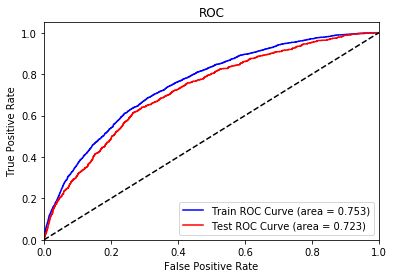

In [88]:
plot_roc_curve(y_train, gbm.predict(x_train, num_iteration=gbm.best_iteration), y_test, lg_pre)

#### Confusion matrix

In [89]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [90]:
lgb_threshold = Find_Optimal_Cutoff(y_test, gbm.predict(x_test, num_iteration=gbm.best_iteration))
print("Threshold:", lgb_threshold)

Threshold: [0.07841116443485306]


In [91]:
def build_confusion_matrix(y, x):
    df = pd.crosstab(y, x, rownames=['True'], colnames=['Predicted'], margins=True)
    if x.sum() == 0:
        df[1] = [0, 0, 0]
    return df.reindex(columns=[0, 1, 'All'])

In [92]:
lgb_resp = pd.Series(gbm.predict(x_test, num_iteration=gbm.best_iteration)).map(lambda x: 1 if x > lgb_threshold[0] else 0)

In [93]:
build_confusion_matrix(y_test.reset_index()['target'], lgb_resp)

Predicted,0,1,All
True,,,
0,5943,2939,8882
1,240,478,718
All,6183,3417,9600


In [94]:
def print_related_statistical_measures(y, x):
    df = pd.crosstab(y, x, rownames=['True'], colnames=['Predicted'], margins=True)
    if x.sum() == 0:
        df[1] = [0, 0, 0]
    if x.sum() == len(y):
        df[0] = [0, 0, 0]
    confusion_matrix = df.reindex(columns=[0, 1, 'All'])
    # Sensitivity: 
    sensitivity = confusion_matrix.at[1, 1]/confusion_matrix.at[1, "All"]
    sensitivity = sensitivity if not math.isnan(sensitivity) else 0
    print("The sensitivity is", sensitivity)
    
    # Specificity
    specificity = confusion_matrix.at[0, 0]/confusion_matrix.at[0, "All"]
    specificity = specificity if not math.isnan(specificity) else 0
    print("The specificity is", specificity)
    
    # PPV
    ppv = confusion_matrix.at[1, 1]/confusion_matrix.at["All", 1]
    ppv = ppv if not math.isnan(ppv) else 0
    print("The ppv is", ppv)
    
    # NPV
    npv = confusion_matrix.at[0, 0]/confusion_matrix.at["All", 0]
    npv = npv if not math.isnan(npv) else 0
    print("The npv is", npv)
    
    # Accuracy: 
    accuracy = (confusion_matrix.at[1, 1]+confusion_matrix.at[0, 0])/confusion_matrix.at["All", "All"]
    accuracy = accuracy if not math.isnan(accuracy) else 0
    print("The accuracy is", accuracy)
    
    # F1-score:
    f1_score = (2*ppv*sensitivity)/(ppv+sensitivity)
    f1_score = f1_score if not math.isnan(f1_score) else 0
    print("The f1_score is", f1_score)

In [95]:
print_related_statistical_measures(y_test.reset_index()['target'], lgb_resp)

The sensitivity is 0.6657381615598886
The specificity is 0.6691060571943256
The ppv is 0.13988879133743048
The npv is 0.9611838913148957
The accuracy is 0.6688541666666666
The f1_score is 0.23119709794437726


In [96]:
print(classification_report(y_test, lgb_resp))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      8882
           1       0.14      0.67      0.23       718

    accuracy                           0.67      9600
   macro avg       0.55      0.67      0.51      9600
weighted avg       0.90      0.67      0.75      9600



### Adaboost

In [ ]:
adab_model = AdaBoostClassifier(
            n_estimators = 225,
            learning_rate = 0.05,
            random_state = 42,
                        )
adab_model.fit(x_train,y_train)

In [ ]:
x_train_probs_adab = adab_model.predict_proba(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs_adab[:,1])
metrics.auc(fpr, tpr)

In [ ]:
x_test_probs_adab = adab_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs_adab[:,1])
metrics.auc(fpr, tpr)

In [ ]:
ad_auc = roc_auc_score(y_test, x_test_probs_adab[:,1])
ad_auc

#### Roc curve

In [ ]:
ad_pre = adab_model.predict_proba(x_test)[:,1]

In [ ]:
plot_roc_curve(y_train, adab_model.predict_proba(x_train)[:,1], y_test, ad_pre)

#### Confusion matrix

In [ ]:
adab_threshold = Find_Optimal_Cutoff(y_test, adab_model.predict(x_test))
print("Threshold:", adab_threshold)

In [ ]:
build_confusion_matrix(y_test.reset_index()['target'], pd.Series(adab_model.predict(x_test)).map(lambda x: 1 if x > adab_threshold[0] else 0))

In [ ]:
print_related_statistical_measures(y_test.reset_index()['target'], pd.Series(adab_model.predict(x_test)).map(lambda x: 1 if x > adab_threshold[0] else 0))

In [ ]:
print(classification_report(y_test, pd.Series(adab_model.predict(x_test)).map(lambda x: 1 if x > adab_threshold[0] else 0)))

### Xgboost

In [ ]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)
dtest_final = xgb.DMatrix(data = x_test_final, label = y_test_final)

In [ ]:
param = {
        'n_estimators': 256,
        'max_depth':2,
        'min_child_weight':0.6,
        'eta': 0.01,
        'silent':1,
        'max_leaf_nodes': 40,
        'eval_metric': 'auc', 
        'gamma': 0.1,
        'subsample': 0.5,
        'colsample_bytree' : 0.5,
        'scale_pos_weight' : sum(target==0) / sum(target==1), # sum(negative instances) / sum(positive instances)
        }

watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 200
xgbst_model = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 20)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, xgbst_model.predict(dtrain))
metrics.auc(fpr, tpr)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgbst_model.predict(dtest))
metrics.auc(fpr, tpr)

In [ ]:
xg_auc = roc_auc_score(y_test, xgbst_model.predict(dtest))
xg_auc

#### Roc curve

In [ ]:
xg_pre = xgbst_model.predict(dtest)

In [ ]:
plot_roc_curve(y_train, xgbst_model.predict(dtrain), y_test, xg_pre)

#### Confusion matrix

In [ ]:
threshold = Find_Optimal_Cutoff(y_test, xgbst_model.predict(dtest))
print(threshold)

In [ ]:
xgbst_resp = pd.Series(xgbst_model.predict(dtest)).map(lambda x: 1 if x > threshold[0] else 0)

In [ ]:
build_confusion_matrix(y_test.reset_index()['target'], xgbst_resp)

In [ ]:
print_related_statistical_measures(y_test.reset_index()['target'], xgbst_resp)

In [ ]:
print(classification_report(y_test, xgbst_resp))

### Catboost

In [ ]:
categorical_features_mask = label_features_mask + dummy_features_mask

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
cbc_model = CatBoostClassifier(
    iterations = 1000, 
    learning_rate = 0.008,
    l2_leaf_reg = 10,
    loss_function = "Logloss",
    rsm = 0.8,
    eval_metric = 'AUC',
    use_best_model = True,
    early_stopping_rounds = 50,
    depth = 2,
    class_weights = class_weights, 
    random_seed = 0,
)

cbc_model.fit(
    x_train, y_train,
    cat_features = categorical_features_mask,
    eval_set = (x_val, y_val),
    verbose = True,
    plot = True
)

In [ ]:
x_train_probs_cbc = cbc_model.predict_proba(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs_cbc[:,1])
metrics.auc(fpr, tpr)

In [ ]:
x_test_probs_cbc = cbc_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs_cbc[:,1])
metrics.auc(fpr, tpr)

In [ ]:
cb_auc = roc_auc_score(y_test, x_test_probs_cbc[:,1])
cb_auc

#### Roc curve

In [ ]:
cb_pre = cbc_model.predict_proba(x_test)[:,1]

In [ ]:
plot_roc_curve(y_train, cbc_model.predict_proba(x_train)[:,1], y_test, cb_pre)

#### Confusion matrix

In [ ]:
build_confusion_matrix(y_test.reset_index()['target'], cbc_model.predict(x_test))

In [ ]:
print_related_statistical_measures(y_test.reset_index()['target'], pd.Series(cbc_model.predict(x_test)).map(lambda x: 1 if x == 1.0 else 0))

In [ ]:
print(classification_report(y_test, pd.Series(cbc_model.predict(x_test)).map(lambda x: 1 if x == 1.0 else 0)))

### Random forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 256, 
                                random_state = 0, 
                                max_depth = 3, 
                                criterion = 'gini',
                                min_samples_split = 10,
                                min_samples_leaf = 5,
                                oob_score = True,
                                min_weight_fraction_leaf = 0.2,
                               )
rf_clf.fit(x_train,y_train)

In [ ]:
x_train_probs_rf = rf_clf.predict_proba(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs_rf[:,1])
metrics.auc(fpr, tpr)

In [ ]:
x_test_probs_rf = rf_clf.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs_rf[:,1])
metrics.auc(fpr, tpr)

In [ ]:
rf_auc = roc_auc_score(y_test, x_test_probs_rf[:,1])
rf_auc

In [ ]:
rf_pre = rf_clf.predict_proba(x_test)[:,1]

In [ ]:
plot_roc_curve(y_train, rf_clf.predict_proba(x_train)[:,1], y_test, rf_pre)

In [ ]:
build_confusion_matrix(y_test, rf_clf.predict(x_test))

In [ ]:
print_related_statistical_measures(y_test, rf_clf.predict(x_test))

In [ ]:
print(classification_report(y_test, rf_clf.predict(x_test)))

### NN

In [ ]:
train_data.shape

In [ ]:
k_model = Sequential()
k_model.add(Dense(388, input_dim=387, activation='relu',kernel_initializer='random_normal'))
k_model.add(Dense(256, input_dim=12, activation='relu',kernel_initializer='random_normal'))
k_model.add(Dense(196, input_dim=12, activation='relu',kernel_initializer='random_normal'))
k_model.add(Dense(64, input_dim=12, activation='relu',kernel_initializer='random_normal'))
k_model.add(Dense(24, input_dim=12, activation='relu',kernel_initializer='random_normal'))
k_model.add(Dense(13, input_dim=12, activation='relu',kernel_initializer='random_normal'))
k_model.add(Dense(1,activation='sigmoid', kernel_initializer='random_normal'))
k_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
k_model.fit(x_train, y_train, batch_size = 1000, epochs = 100, validation_split = 0.2)

In [ ]:
y_pred = k_model.predict(x_test)
print(classification_report(y_test.values, y_pred>0.5))
print('Train AUC is',roc_auc_score(y_train.values, k_model.predict(x_train)>0.5))
print('Test AUC is',roc_auc_score(y_test.values, y_pred>0.5))

In [ ]:
score = k_model.evaluate(x_train, y_train, batch_size=128)
score

In [ ]:
score = k_model.evaluate(x_test, y_test, batch_size=128)
score

## Ensemble

In [ ]:
train_ens = pd.DataFrame({'lg_pre':lg_pre,'ad_pre':ad_pre,'xg_pre':xg_pre,'rf_pre':rf_pre,'cb_pre':cb_pre}) 
train_ens.head()

In [ ]:
ensemble_model = LinearRegression().fit(train_ens, y_test)

In [ ]:
lg_pre_f = gbm.predict(x_test_final, num_iteration=gbm.best_iteration)
ad_pre_f = adab_model.predict_proba(x_test_final)[:,1]
xg_pre_f = xgbst_model.predict(dtest_final)
cb_pre_f = cbc_model.predict_proba(x_test_final)[:,1]
rf_pre_f = rf_clf.predict_proba(x_test_final)[:,1]
stacked_test_predcitions = np.column_stack((lg_pre_f,ad_pre_f,xg_pre_f,cb_pre_f,rf_pre_f))

In [ ]:
final_predictions = ensemble_model.predict(stacked_test_predcitions)
threshold_f = Find_Optimal_Cutoff(y_test_final.values, final_predictions)
fp = pd.Series(final_predictions).map(lambda x: 1 if x > threshold_f[0] else 0)

In [ ]:
(fp.values == y_test_final.values).sum()/len(fp.values == y_test_final.values)

In [ ]:
print(classification_report(y_test_final.values, fp.values))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_final.values, fp.values)
metrics.auc(fpr, tpr)

### Use recall is not 0

In [ ]:
train_ens_2 = train_ens[['lg_pre','xg_pre','cb_pre']]

In [ ]:
ensemble_model_2 = LinearRegression().fit(train_ens_2, y_test)

In [ ]:
lg_pre_f = gbm.predict(x_test_final, num_iteration=gbm.best_iteration)
xg_pre_f = xgbst_model.predict(dtest_final)
cb_pre_f = cbc_model.predict_proba(x_test_final)[:,1]
stacked_test_predcitions_2 = np.column_stack((lg_pre_f,xg_pre_f,cb_pre_f))

In [ ]:
final_predictions_2 = ensemble_model_2.predict(stacked_test_predcitions_2)
threshold_final = Find_Optimal_Cutoff(y_test_final.values, final_predictions_2)
fp2 = pd.Series(final_predictions_2).map(lambda x: 1 if x > threshold_final[0] else 0)

In [ ]:
(fp2.values == y_test_final.values).sum()/len(fp2.values == y_test_final.values)

In [ ]:
print(classification_report(y_test_final.values, fp2.values))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_final.values, fp2.values)
metrics.auc(fpr, tpr)

### SVC

In [ ]:
from sklearn.svm import SVC
ensemble_model_svc = SVC(gamma='auto', probability=True).fit(train_ens_2, y_test)
final_predictions_svc = ensemble_model_svc.predict_proba(stacked_test_predcitions_2)
fp_svc = pd.Series(final_predictions_svc[:,1]).map(lambda x: 1 if x >= 0.5 else 0)
print(classification_report(y_test_final.values, fp_svc))
print(roc_auc_score(y_test_final.values, fp_svc))

### Linear weighted ensemble

In [ ]:
lg_pre_f = gbm.predict(x_test_final, num_iteration=gbm.best_iteration)
xg_pre_f = xgbst_model.predict(dtest_final)
cb_pre_f = cbc_model.predict_proba(x_test_final)[:,1]

# lg_pre_rank = pd.DataFrame(lg_pre_f).rank()
# xg_pre_rank = pd.DataFrame(xg_pre_f).rank()
# cb_pre_rank = pd.DataFrame(cb_pre_f).rank()

In [ ]:
lg_auc,xg_auc,cb_auc

In [ ]:
pred_f = 0.7*cb_pre_f + 0.1*lg_pre_f + 0.2*xg_pre_f

In [ ]:
threshold_f = Find_Optimal_Cutoff(y_test_final.values, pred_f)
pred_f = pd.Series(pred_f).map(lambda x: 1 if x > threshold_f[0] else 0)

In [ ]:
print(classification_report(y_test_final.values, pred_f))
print(roc_auc_score(y_test_final.values, pred_f))

## Feature importance: Shap

In [ ]:
lgb_shap_explainer = shap.TreeExplainer(gbm)
lgb_shap_vals_train = lgb_shap_explainer.shap_values(x_train)
lgb_shap_vals_test = lgb_shap_explainer.shap_values(x_test)

In [ ]:
shap.summary_plot(lgb_shap_vals_train[0], x_train)

In [ ]:
shap.summary_plot(lgb_shap_vals_test[0], x_test)